In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('data.csv')
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [3]:
df.set_index('id', inplace=True)

In [4]:
df.shape

(569, 31)

In [5]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

# EDA

In [7]:
data=df.copy()

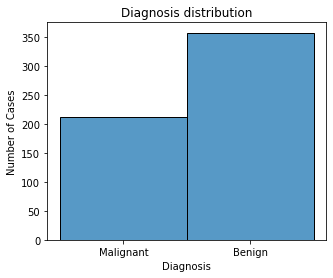

In [8]:
data.diagnosis=data.diagnosis.replace(['M', 'B'], ['Malignant', 'Benign'])
plt.figure(figsize=(5,4))
sns.histplot(x='diagnosis', data=data)
plt.title('Diagnosis distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Cases')
plt.show()

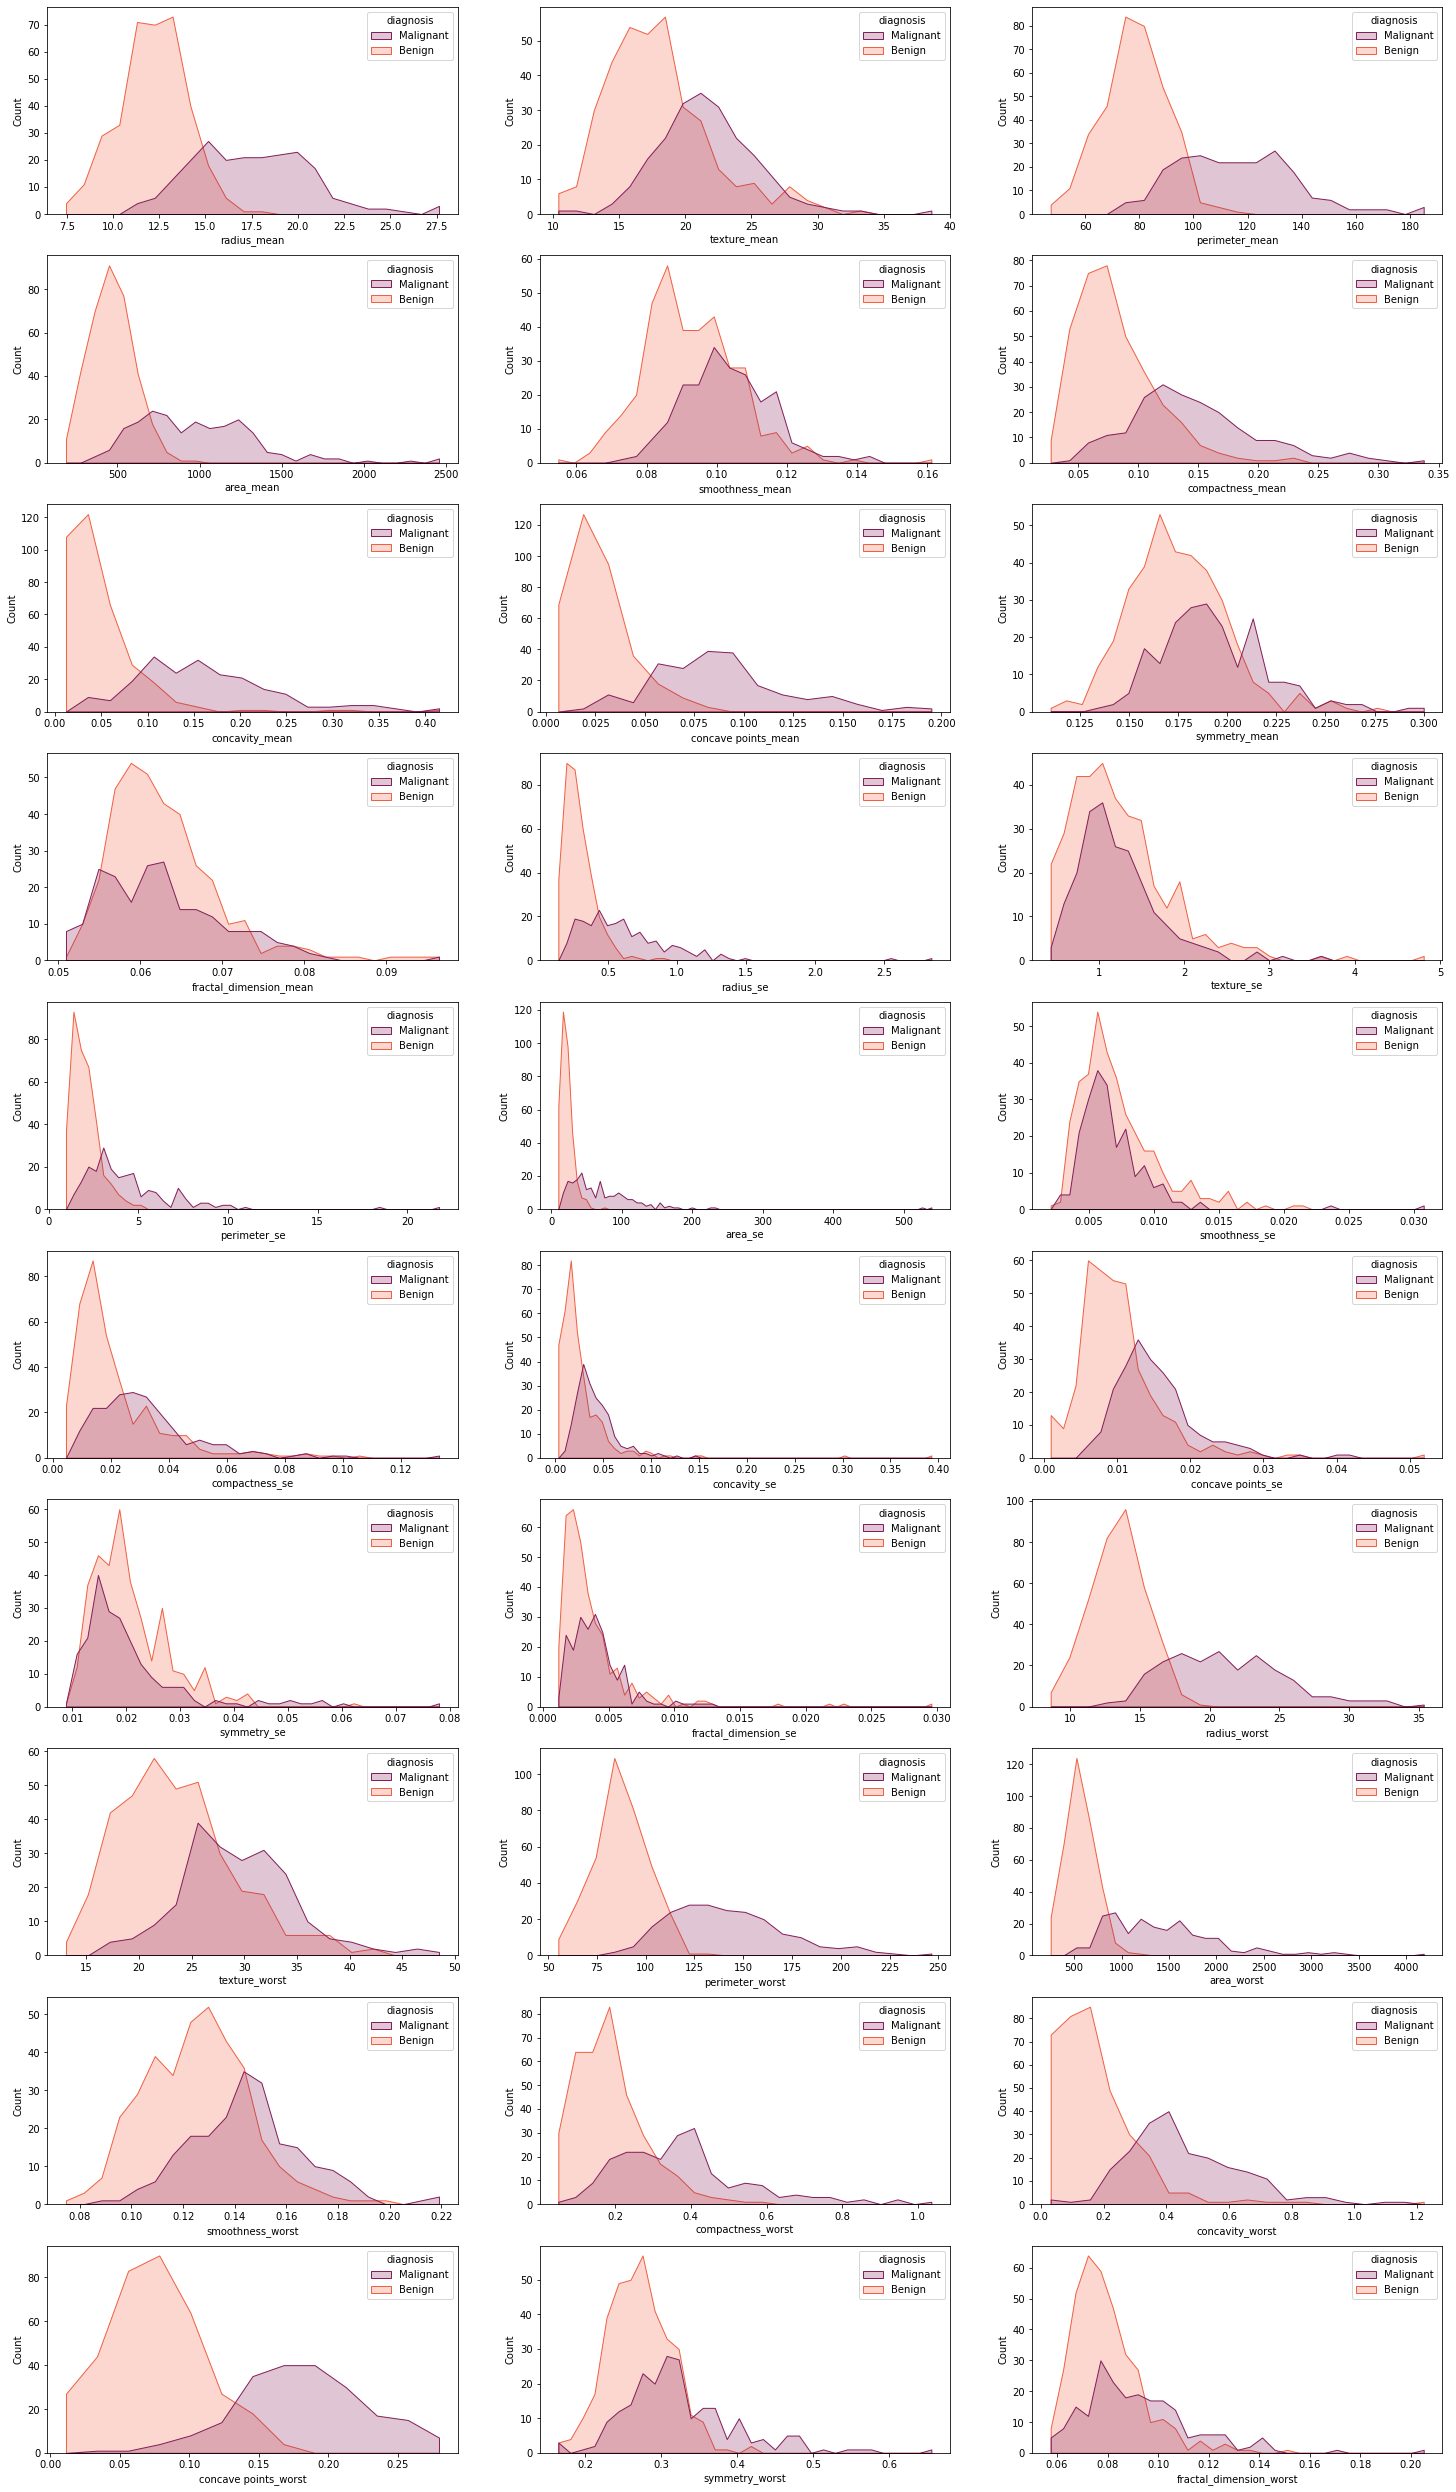

In [9]:
fig, ax = plt.subplots(10, 3, figsize=(25,45))
row, col_= 0, 0
for col in data.columns[1::]:
    sns.histplot(data, x=data[col], hue="diagnosis", element="poly", stat="count",  
                 palette='rocket', ax=ax[row][col_])
    col_+=1
    if col_==3:
        row+=1
        col_=0

# Outlier Analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


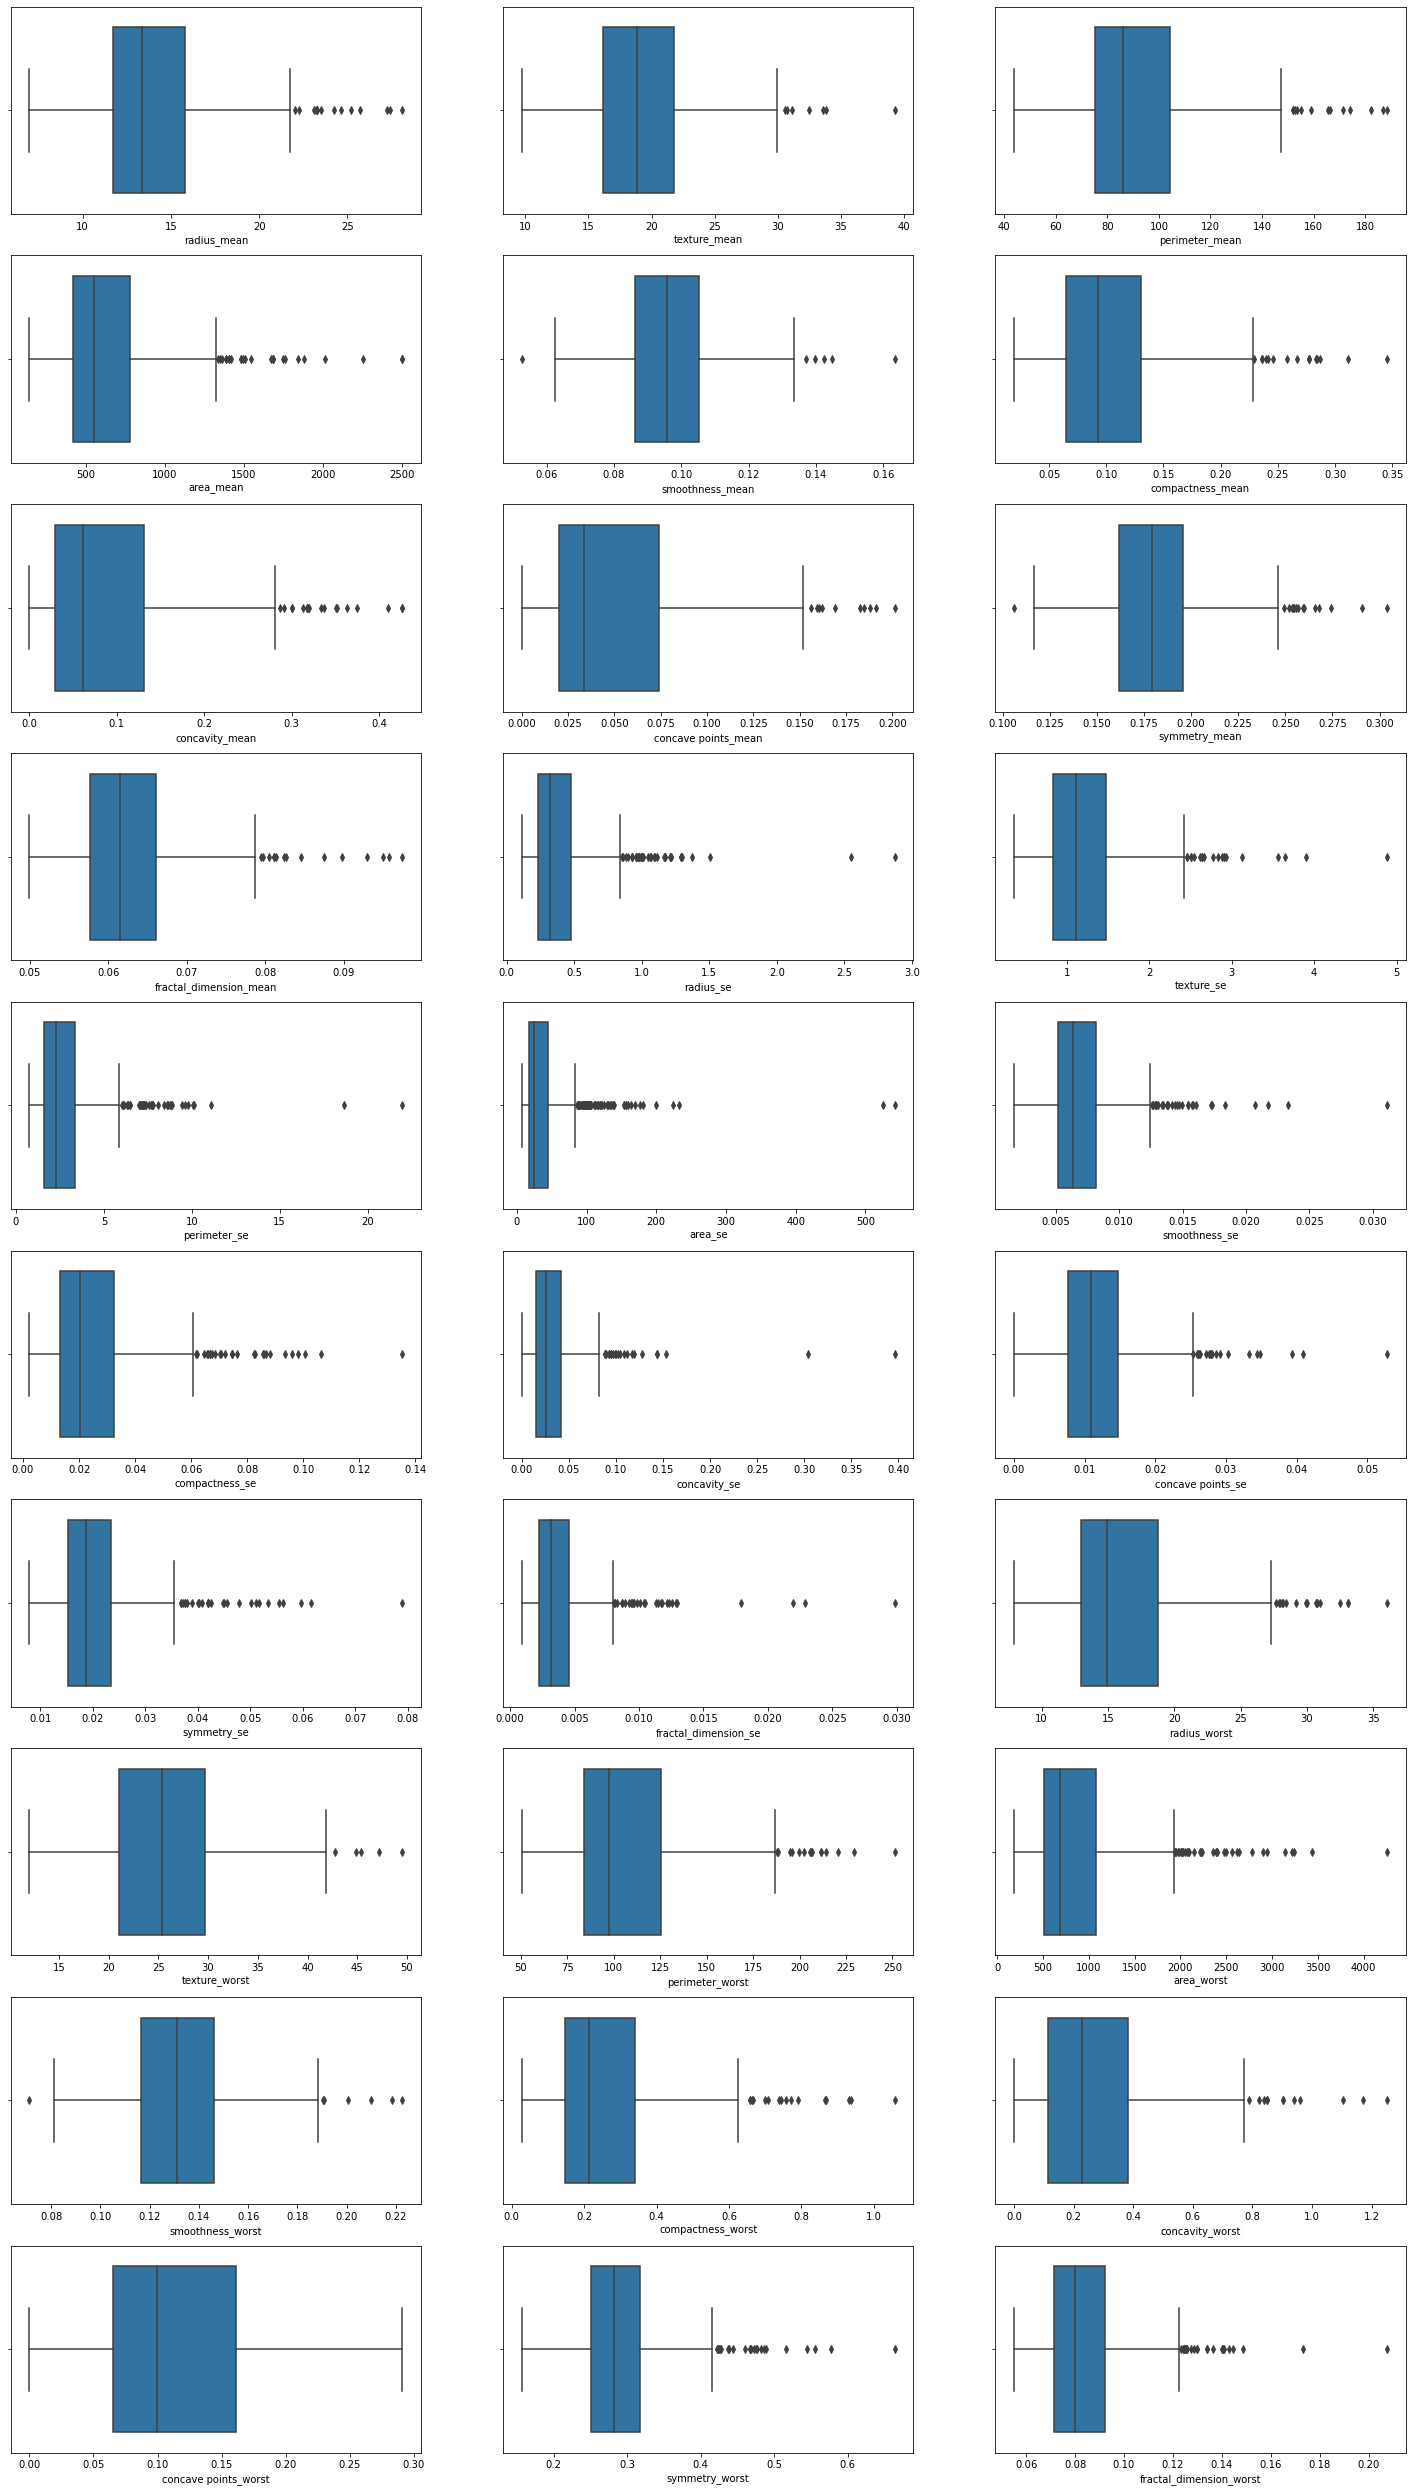

In [11]:
fig, ax = plt.subplots(10, 3, figsize=(25,45))
row, col_= 0, 0
for col in df.columns[1::]:
    sns.boxplot(df[col], ax=ax[row][col_])
    col_+=1
    if col_==3:
        row+=1
        col_=0

In [12]:
def thresholds(df, col_name, q1=0.05, q3=0.90):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    df.loc[(df[col_name] < low_limit), col_name] = low_limit
    df.loc[(df[col_name] > up_limit), col_name] = up_limit
    return df

In [13]:
for col in df.columns[1::]:
    df1=thresholds(df, col, 0.05, 0.90)

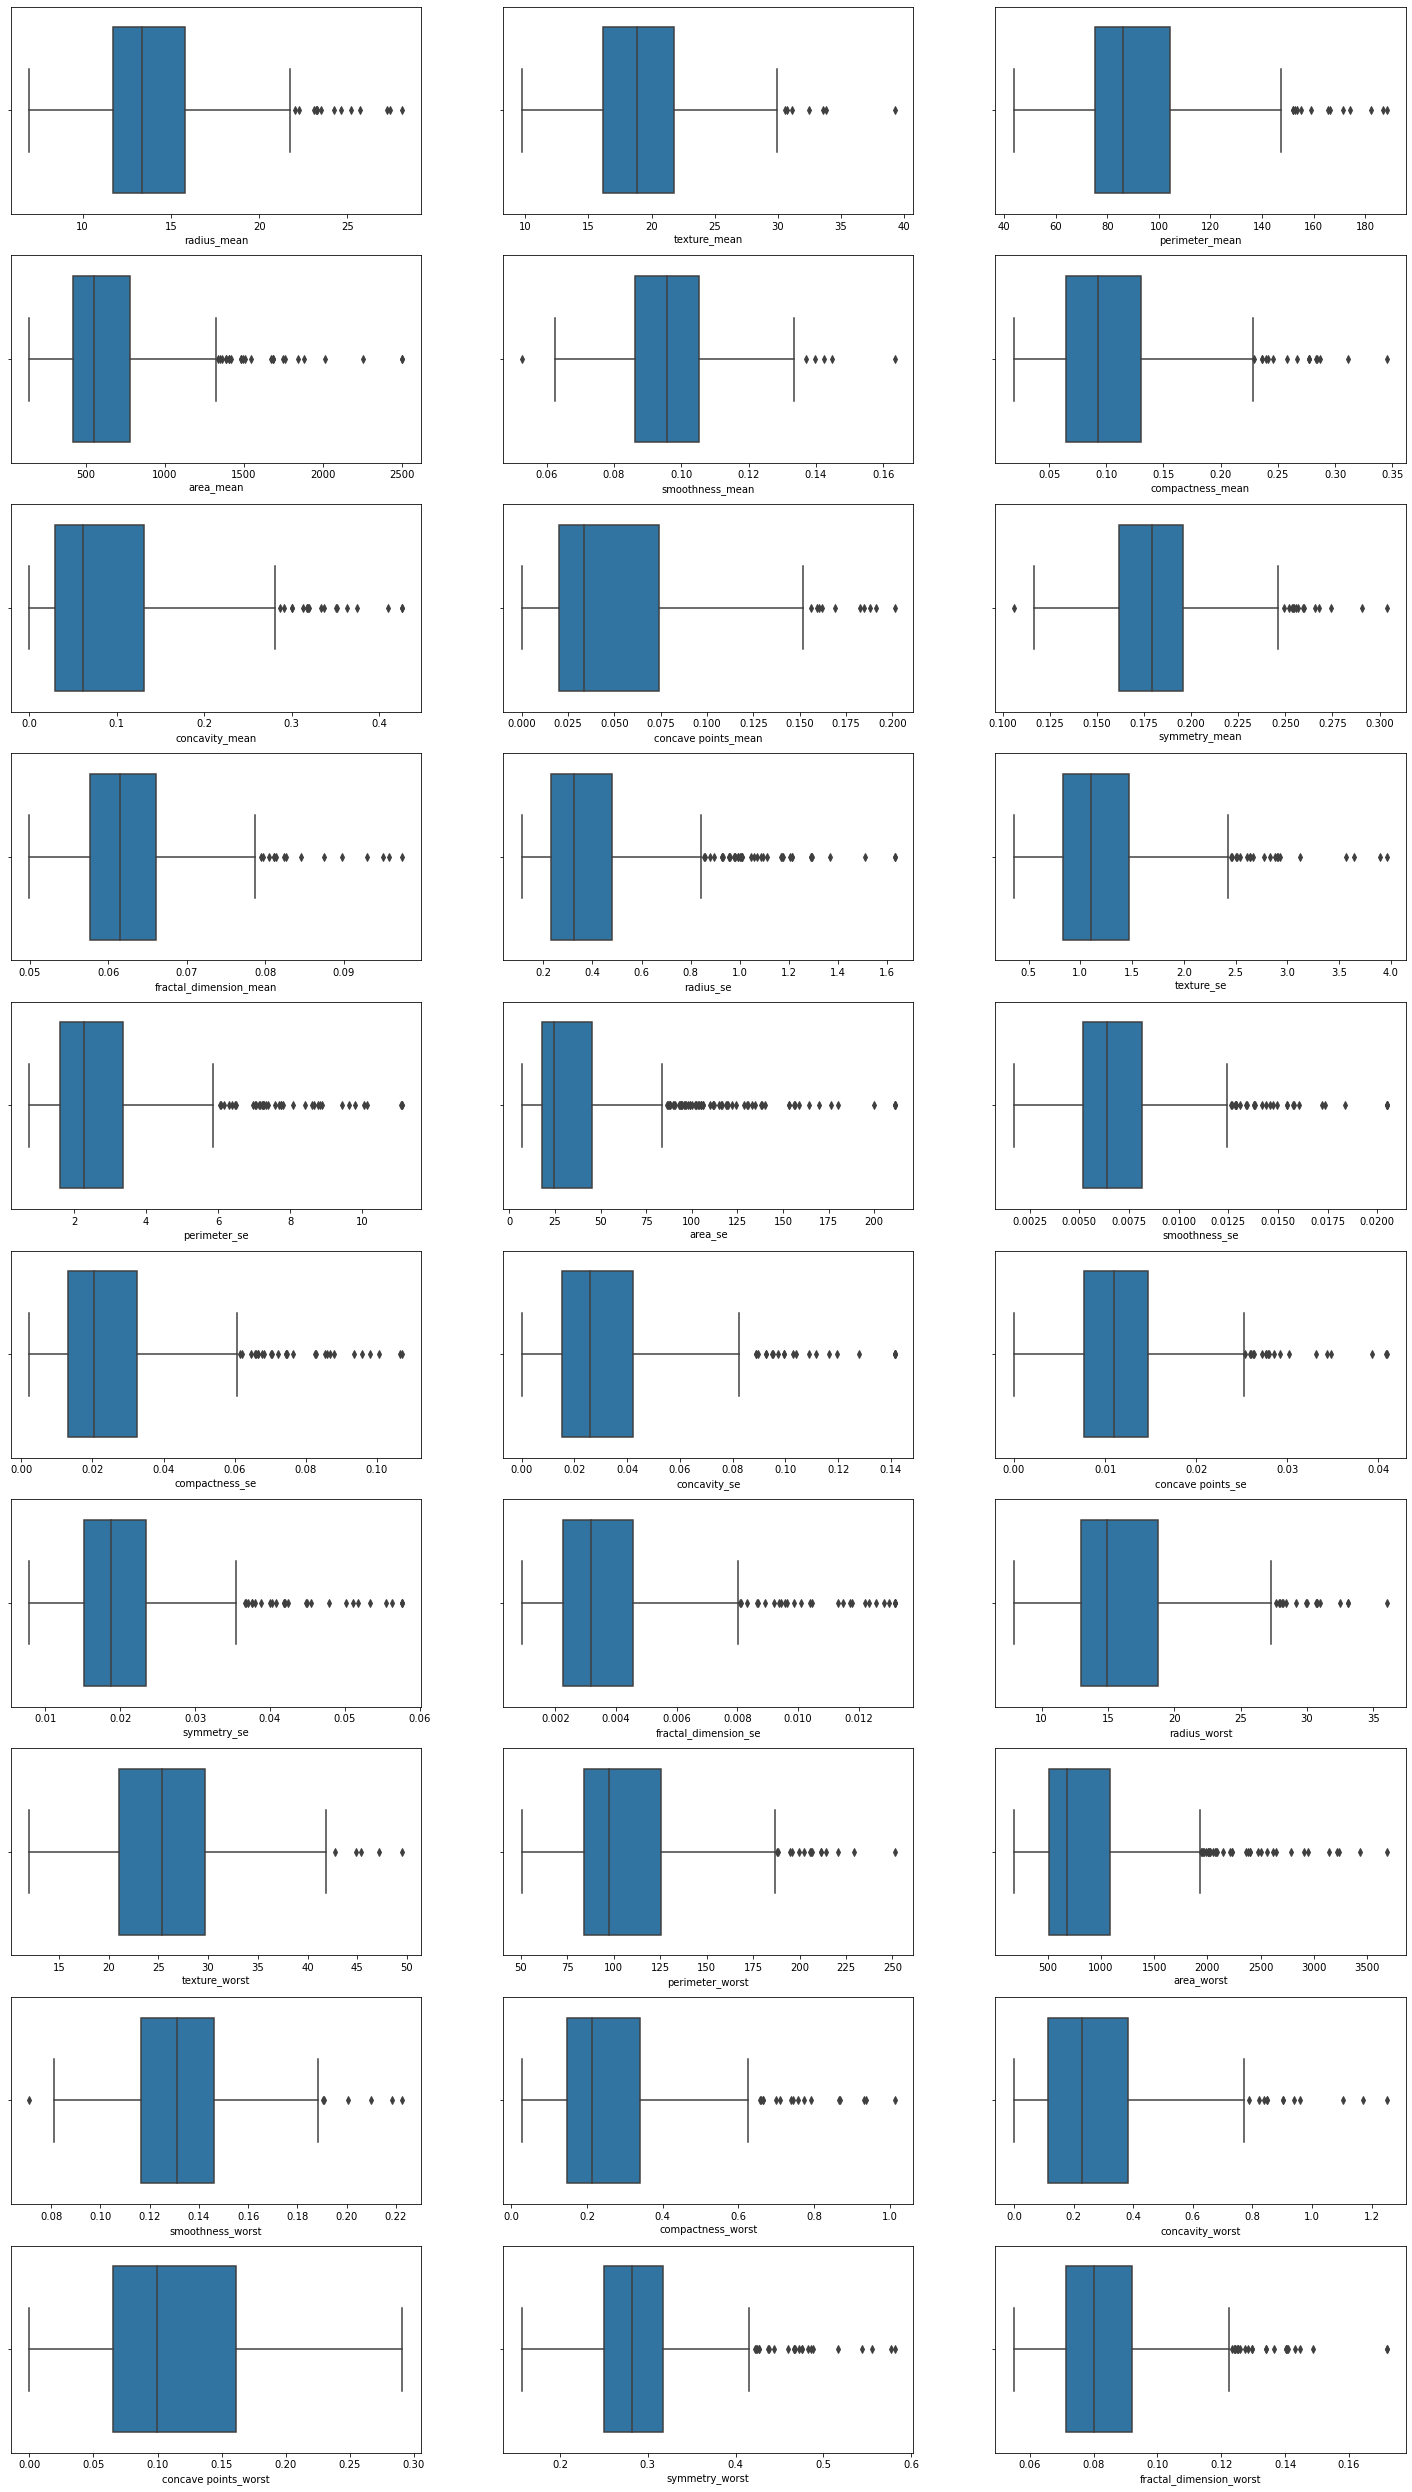

In [14]:
fig, ax = plt.subplots(10, 3, figsize=(25,45))
row, col_= 0, 0
for col in df1.columns[1::]:
    sns.boxplot(df1[col], ax=ax[row][col_])
    col_+=1
    if col_==3:
        row+=1
        col_=0

# Local Outlier Factor

In [15]:
df.diagnosis=df.diagnosis.replace(['M', 'B'], ['1', '0'])

In [16]:
from sklearn.neighbors import LocalOutlierFactor

In [17]:
def local_outlier_factor(df, n_neighs=10):
    lof=LocalOutlierFactor(n_neighbors=n_neighs)
    outliers=lof.fit_predict(df)
    df1=df.drop(list(df[outliers==-1].index), axis=0)
    print(f'{df[outliers==-1].shape[0]} rows deleted')
    return df1

In [18]:
lof_data=local_outlier_factor(df)

22 rows deleted


In [19]:
lof_data.shape

(547, 31)

# Scailing

In [20]:
from sklearn.preprocessing import RobustScaler

In [21]:
def scaler(df):
    rs = RobustScaler()
    col_names=[col for col in df.columns if col!='diagnosis']
    df[col_names] = rs.fit_transform(df[col_names])
    return df

In [22]:
scaled_data=scaler(lof_data)

In [23]:
scaled_data.shape

(547, 31)

# Building Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [25]:
Y=scaled_data.diagnosis
X=scaled_data.drop(['diagnosis'], axis=1)
print(Y.shape, X.shape)

(547,) (547, 30)


In [26]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=42)

In [27]:
knn_params={
    'n_neighbors': list(range(2,6)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(1,6)),
}

In [28]:
clf=GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, return_train_score=True)
clf.fit(X_train, Y_train)
Y_test_pred=clf.predict(X_test)
acc_score=accuracy_score(Y_test, Y_test_pred)
print(f'Accuracy Score: {np.round(acc_score*100,2)}%')
print(f'Best params: {clf.best_params_}')

Accuracy Score: 94.16%
Best params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}
